# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 9381 Игнашов Вадим, вариант 5.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

**Обыкновенное дифференциальное уравнение (ОДУ)** - дифференциальное уравнение для функции от одной переменной.

$F(x,y,y',y'',...,y^{(n)})=0$, где $y(x)$ - неизвестная функция от переменной $x$

**Задача Коши** - задача, состоящая в нахождении частного решения дифференциального уравнения, которое удовлетворяет
некоторым начальным условиям. Общий вид задачи Коши:

$\begin{equation*}
 \begin{cases}
   f(x,y,y',y'',...,y^{(n)}) = 0\\
   y(x_0)=y_0\\
   y'(x_0)=y_1\\
   y''(x_0)=y_2\\
   ...\\
   y^{(n-1)}(x_0)=y_{n-1}
 \end{cases}
\end{equation*}
$

## Постановка задачи

Дано дифференциальное уравнение:

$y''=f(x,y), a<x<b$ (1)

и граничные условия

$y(a)=y_a, y(b)=y_b$ (2)

Требуется найти решение задачи (1)-(2) и построить его график.
Рассмотрим задачу Коши для уравнения (1) с начальными условиями

$y(a)=y_a, y'(a)=h$ (3)

План решения основан на многократном решении задачи Коши (1), (3). Значение решения задачи Коши при $x=b$ является функцией от $h$.

Задача сводится к отысканию такого значения переменной $h$, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b,h)=y_b$ (4)

Это уравнение с одним неизвестным $h$.

Для его решения можно применить стандартный метод половинного
деления.

## Выполнение работы

**Вариант №5**

$y''=f(x,y) = 2^{-x}(x+y)$

$a=0$

$b=2$

$y_a=4$

$y_b=1$

Если $y''=f(x,y)=2^{-x}(x+y)$, тогда пусть

$\begin{equation*}
 \begin{cases}
   y'=g(x,y)\\
   g'=2^{-x}(x+y)
 \end{cases}
\end{equation*}
$

Задачу Коши представим в виде системы:

$\begin{equation*}
 \begin{cases}
   y'=g(x,y)\\
   g'=2^{-x}(x+y)\\
   y(a)=y_a\\
   y'(a)=h
 \end{cases}
\end{equation*}$

Подключим необходимые библиотеки, объявим переменные и определим функцию:

In [107]:
from scipy import integrate 
import numpy as np
import matplotlib.pyplot as plt

a=0
b=2
y_a=4
y_b=1

def F(x, y):
    return 2**(-x)*(x+y)

Зададим $h_0$, пусть $h_0=2$. Вычислим $y(b, h_0):$

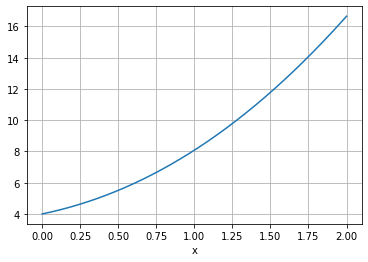

b=2
h_0=2
y(2,2)=16.65377084265927


In [108]:
def D(y, t):
    return [y[1], 2**(-t)*(t+y[0])]

h_0 = 2
res = integrate.odeint(D,[y_a, h_0], np.arange(a, b, 0.0001))

plt.plot(np.arange(a,b,0.0001),res[:,0])
plt.grid(True)
plt.xlabel("x")
plt.show()

print(f"b={b}\nh_0={h_0}\ny({b},{h_0})={res[-1,0]}")

Как мы видим, $y(b,h_0)>y_b$, задача не была решена, поэтому будем решать задачу Коши с $h = h+\Delta h$, пока $y(b,h_n)>y_b$
, и запоминать полученные правые и левые значения $h$

Возьмем $\Delta h=-0.01$

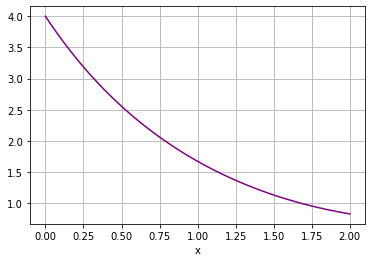

[-3.700000000000003, -3.6000000000000028]


In [109]:
h = h_0
dh = -0.1
h_right = h
h_left = h

while res[-1, 0] > y_b:
    h_right = h
    h = h+dh
    h_left = h
    res = integrate.odeint(D,[y_a, h], np.arange(a, b, 0.0001))

plt.plot(np.arange(a,b,0.0001),res[:,0],c="purple")
plt.grid(True)
plt.xlabel("x")
plt.show()

print(f"[{h_left}, {h_right}]")

Определили, что $h\in[-3.7,-3.6]$. Воспользуемся методом половинного деления и определим значение
$h$, при котором $y(b,h_0)=y_b$ с точностью

$|y(b,h_n)-y(b,h_{n-1})|<0.001$

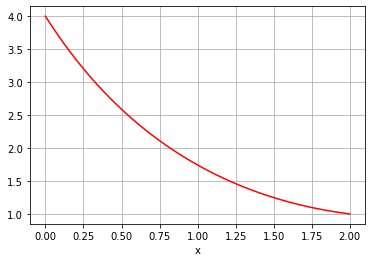

h = -3.639453125000003
y(2,-3.639453125000003)=0.999762044705481


In [110]:
res_left=res[-1,0]
res=(integrate.odeint(D,[y_a, h_right], np.arange(a, b, 0.0001)))
res_right = res[-1,0]

while abs(res_right-res_left)>0.001:
    dh = abs(h_left-h_right)/2
    h_middle = h_left+dh
    res = integrate.odeint(D,[y_a, h_middle], np.arange(a, b, 0.0001))
    if res[-1, 0] > y_b:
        h_right=h_middle
        res_right=res[-1,0]
    else:
        h_left=h_middle
        res_left=res[-1,0]

plt.plot(np.arange(a,b,0.0001),res[:,0],c="red")
plt.grid(True)
plt.xlabel("x")
plt.show()

print(f"h = {h_left}")
print(f"y({b},{h_left})={res_left}")

## Выводы

В процессе выполнения практической работы была решена краевая задача для уравнения II-го порядка, с помощью
многократного решения задачи Коши. Результаты были найдены с определенной точностью.

Результаты:

$h=-3.639453125000003$

$y(b,h) = 0.999762044705481$